Topic: Maryland Housing Model

Personal Project

Garrett Fanning

# Introduction

# Data Description

## Source

https://www.census.gov/programs-surveys/popest/data/tables.html
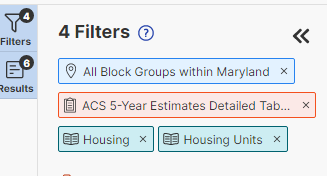

https://data.census.gov/cedsci/

## Feature Breakdown

**Housing** - Number of houses in a block
<br> **Population** - Population in a block
<br> **Earnings** - Median Earnings in a block
<br> **Poverty** - Number living in poverty(based on Census income threshold) in a block
<br> **Employment** - Number of people employed in a block
<br> **Rooms** - Median number of rooms per house in a block
<br> **Children** - Number of children in a block
<br> **HouseType** - Number of houses occupied
<br> **Age** - Median Age of a block
<br> **Transportation** - Median length of commute to work
<br> **HousePrice** - Median price of a home in a block
<br> **School** - Number of schools in a block

# Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Creating House Object

In [146]:
class House:
    # Initialize state of object
    def __init__(self):
        pass
    
    #Read the file in for each feature across all years available
    def read_house(self,fileName, list_of_years):
        all_years = pd.DataFrame()
        a_dictionary = {}
        for year in list_of_years:
            filepath = fileName+'_'+year+'.csv'
            a_dictionary["%s %s" % (fileName,year)] = pd.read_csv(filepath)
            temp = pd.DataFrame.from_dict(a_dictionary["%s %s" % (fileName,year)])
            temp['Year'] = year
            all_years = pd.concat([all_years,temp])
        return all_years
    
    def clean_house(self, original_file, feature, code):
        #Eliminate unecessary column label row
        new_file = original_file.loc[original_file[code].str.isnumeric() & original_file[code].notna()]
        #Narrow to only columns needed
        new_file = new_file[[code,"GEO_ID","NAME","Year"]]
        #Rename Columns
        new_file = new_file.rename(columns = {code:feature,"GEO_ID":"GEO_ID","NAME":"Name","Year":"Year"})
        #Convert string column to float
        new_file[feature] = new_file[feature].astype(float)
        #Do not include rows/each 'Block' with 0
        new_file = new_file.loc[(new_file[feature]>0)]
        #Sort by increasing
        new_file = new_file.sort_values(by = feature)
        return new_file
    
    #Issues with Rooms data requires separate method be created
    def clean_house_room(self, original_file, feature, code):
        #Eliminate unecessary column label row
        new_file = original_file.loc[(original_file[code].notna()) & -(original_file[code].str.contains('!') | original_file[code].str.contains('9.0+')| original_file[code].str.contains('-'))]
        #Narrow to only columns needed
        new_file = new_file[[code,"GEO_ID","NAME","Year"]]
        #Rename Columns
        new_file = new_file.rename(columns = {code:feature,"GEO_ID":"GEO_ID","NAME":"Name","Year":"Year"})
        #Convert string column to float
        new_file[feature] = new_file[feature].astype(float)
        #Do not include rows/each 'Block' with 0
        new_file = new_file.loc[(new_file[feature]>0)]
        #Sort by increasing
        new_file = new_file.sort_values(by = feature)
        return new_file


# Read Data In

## Maryland Housing Data

In [70]:
#first part of data source file name
fileName = 'Maryland_Housing'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Housing_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Units'
#code of feature before being renamed
code = 'B25001_001E'
#run clean_house method in House object
Maryland_Housing = H.clean_house(Maryland_Housing_Original, feature, code)
Maryland_Housing

,Units,GEO_ID,Name,Year
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
889,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2015
946,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2020
365,4.0,1500000US240039800001,"Block Group 1, Census Tract 9800, Anne Arundel...",2014
...,...,...,...,...
3229,5341.0,1500000US240479501002,"Block Group 2, Census Tract 9501, Worcester Co...",2016
3229,5603.0,1500000US240479501002,"Block Group 2, Census Tract 9501, Worcester Co...",2017
3412,5627.0,1500000US240479501002,"Block Group 2, Census Tract 9501, Worcester Co...",2020
3229,5688.0,1500000US240479501002,"Block Group 2, Census Tract 9501, Worcester Co...",2018


## Maryland Population Data

In [71]:
#first part of data source file name
fileName = 'Maryland_Population'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Population_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Population'
#code of feature before being renamed
code = 'B01003_001E'
#run clean_house method in House object
Maryland_Population = H.clean_house(Maryland_Population_Original, feature, code)
Maryland_Population

,Population,GEO_ID,Name,Year
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2015
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2015
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2016
...,...,...,...,...
1174,8211.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2018
1805,8236.0,1500000US240317002051,"Block Group 1, Census Tract 7002.05, Montgomer...",2018
1174,8739.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019
1805,8987.0,1500000US240317002051,"Block Group 1, Census Tract 7002.05, Montgomer...",2019


## Maryland Earnings Data

In [72]:
#first part of data source file name
fileName = 'Maryland_Earnings'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Earnings_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Earnings'
#code of feature before being renamed
code = 'B20017_001E'
#run clean_house method in House object
Maryland_Earnings = H.clean_house(Maryland_Earnings_Original, feature, code)
Maryland_Earnings

,Earnings,GEO_ID,Name,Year
2904,2541.0,1500000US240338072002,"Block Group 2, Census Tract 8072, Prince Georg...",2017
1398,2730.0,1500000US240217668003,"Block Group 3, Census Tract 7668, Frederick Co...",2018
1015,2834.0,1500000US240135075003,"Block Group 3, Census Tract 5075, Carroll Coun...",2018
1398,2903.0,1500000US240217668003,"Block Group 3, Census Tract 7668, Frederick Co...",2017
1782,2908.0,1500000US240299503003,"Block Group 3, Census Tract 9503, Kent County,...",2017
...,...,...,...,...
3989,161000.0,1500000US245102712004,"Block Group 4, Census Tract 2712, Baltimore ci...",2020
3835,165179.0,1500000US245102712004,"Block Group 4, Census Tract 2712, Baltimore ci...",2019
2496,168281.0,1500000US240317055022,"Block Group 2, Census Tract 7055.02, Montgomer...",2020
2330,172500.0,1500000US240317047004,"Block Group 4, Census Tract 7047, Montgomery C...",2018


## Maryland Poverty Data

In [73]:
#first part of data source file name
fileName = 'Maryland_Poverty'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Poverty_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Poverty'
#code of feature before being renamed
code = 'B23024_001E'
#run clean_house method in House object
Maryland_Poverty = H.clean_house(Maryland_Poverty_Original, feature, code)
Maryland_Poverty

,Poverty,GEO_ID,Name,Year
1912,3.0,1500000US240317007232,"Block Group 2, Census Tract 7007.23, Montgomer...",2013
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
3716,4.0,1500000US245102604032,"Block Group 2, Census Tract 2604.03, Baltimore...",2019
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2014
...,...,...,...,...
1174,5294.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019
258,5324.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2019
258,5448.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2018
258,5461.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2017


## Maryland Employment Data

In [74]:
#first part of data source file name
fileName = 'Maryland_Employment'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Employment_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Employment'
#code of feature before being renamed
code = 'B23025_001E'
#run clean_house method in House object
Maryland_Employment = H.clean_house(Maryland_Employment_Original, feature, code)
Maryland_Employment

,Employment,GEO_ID,Name,Year
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2015
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2013
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2016
...,...,...,...,...
152,6280.0,1500000US240037301003,"Block Group 3, Census Tract 7301, Anne Arundel...",2019
258,6281.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2018
1174,6462.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019
3297,6484.0,1500000US240430110001,"Block Group 1, Census Tract 110, Washington Co...",2020


## Maryland Rooms Data

In [147]:
#first part of data source file name
fileName = 'Maryland_Rooms'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Rooms_Original = H.read_house(fileName , list_of_years)


#specific feature being used from source file
feature = 'Rooms'
#code of feature before being renamed
code = 'B25018_001E'
#run clean_house method in House object
Maryland_Rooms = H.clean_house_room(Maryland_Rooms_Original, feature, code)
Maryland_Rooms

,Rooms,GEO_ID,Name,Year
3856,1.4,1500000US245102717001,"Block Group 1, Census Tract 2717, Baltimore ci...",2018
4009,1.4,1500000US245102717001,"Block Group 1, Census Tract 2717, Baltimore ci...",2020
3856,1.4,1500000US245102717001,"Block Group 1, Census Tract 2717, Baltimore ci...",2019
1695,1.4,1500000US240253065002,"Block Group 2, Census Tract 3065, Harford Coun...",2020
3856,1.5,1500000US245102717001,"Block Group 1, Census Tract 2717, Baltimore ci...",2017
...,...,...,...,...
1642,8.5,1500000US240276021004,"Block Group 4, Census Tract 6021, Howard Count...",2016
986,8.5,1500000US240135042024,"Block Group 4, Census Tract 5042.02, Carroll C...",2016
2052,8.5,1500000US240317013044,"Block Group 4, Census Tract 7013.04, Montgomer...",2014
1915,8.5,1500000US240317008101,"Block Group 1, Census Tract 7008.10, Montgomer...",2016


In [125]:
Maryland_Rooms_Original['B25018_001E'].dtype

dtype('O')

## Maryland Children Data

In [76]:
#first part of data source file name
fileName = 'Maryland_Children'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Children_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Children'
#code of feature before being renamed
code = 'B11005_001E'
#run clean_house method in House object
Maryland_Children = H.clean_house(Maryland_Children_Original, feature, code)
Maryland_Children

,Children,GEO_ID,Name,Year
889,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2015
946,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2020
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2014
...,...,...,...,...
1174,3078.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2018
258,3189.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2019
258,3218.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2017
1174,3369.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019


## Maryland HouseType Data

In [77]:
#first part of data source file name
fileName = 'Maryland_HouseType'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2019','2020']

H = House()
#run read_house method in House object
Maryland_HouseType_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'HouseType'
#code of feature before being renamed
code = 'B11016_001E'
#run clean_house method in House object
Maryland_HouseType = H.clean_house(Maryland_HouseType_Original, feature, code)
Maryland_HouseType

,HouseType,GEO_ID,Name,Year
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
946,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2020
889,3.0,1500000US240054925002,"Block Group 2, Census Tract 4925, Baltimore Co...",2015
365,4.0,1500000US240039800001,"Block Group 1, Census Tract 9800, Anne Arundel...",2014
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2015
...,...,...,...,...
258,2906.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2015
152,2985.0,1500000US240037301003,"Block Group 3, Census Tract 7301, Anne Arundel...",2019
258,3053.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2016
258,3189.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2019


## Maryland Age Data

In [78]:
#first part of data source file name
fileName = 'Maryland_Age'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Age_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Units'
#code of feature before being renamed
code = 'B01002_001E'
#run clean_house method in House object
Maryland_Age = H.clean_house(Maryland_Age_Original, feature, code)
Maryland_Age

,Units,GEO_ID,Name,Year


## Maryland Transportation Data

In [79]:
#first part of data source file name
fileName = 'Maryland_Transportation'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_Transportation_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'Transportation'
#code of feature before being renamed
code = 'B08134_001E'
#run clean_house method in House object
Maryland_Transportation = H.clean_house(Maryland_Transportation_Original, feature, code)
Maryland_Transportation

,Transportation,GEO_ID,Name,Year
3871,3.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2020
993,3.0,1500000US240135052032,"Block Group 2, Census Tract 5052.03, Carroll C...",2014
3716,4.0,1500000US245102604032,"Block Group 2, Census Tract 2604.03, Baltimore...",2019
365,4.0,1500000US240039800001,"Block Group 1, Census Tract 9800, Anne Arundel...",2015
365,4.0,1500000US240039800001,"Block Group 1, Census Tract 9800, Anne Arundel...",2014
...,...,...,...,...
1174,4411.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019
152,4514.0,1500000US240037301003,"Block Group 3, Census Tract 7301, Anne Arundel...",2019
258,4648.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2017
258,4731.0,1500000US240037401022,"Block Group 2, Census Tract 7401.02, Anne Arun...",2019


## Maryland HousePrice Data

In [80]:
#first part of data source file name
fileName = 'Maryland_HousePrice'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_HousePrice_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'HousePrice'
#code of feature before being renamed
code = 'B25077_001E'
#run clean_house method in House object
Maryland_HousePrice = H.clean_house(Maryland_HousePrice_Original, feature, code)
Maryland_HousePrice

,HousePrice,GEO_ID,Name,Year
3592,10400.0,1500000US245102003001,"Block Group 1, Census Tract 2003, Baltimore ci...",2014
3528,14100.0,1500000US245101601003,"Block Group 3, Census Tract 1601, Baltimore ci...",2013
1595,14800.0,1500000US240253029012,"Block Group 2, Census Tract 3029.01, Harford C...",2020
3867,18800.0,1500000US245102718023,"Block Group 3, Census Tract 2718.02, Baltimore...",2017
2658,19800.0,1500000US240338022011,"Block Group 1, Census Tract 8022.01, Prince Ge...",2013
...,...,...,...,...
2350,1801500.0,1500000US240317053001,"Block Group 1, Census Tract 7053, Montgomery C...",2016
2464,1856600.0,1500000US240317047003,"Block Group 3, Census Tract 7047, Montgomery C...",2020
2329,1875000.0,1500000US240317047003,"Block Group 3, Census Tract 7047, Montgomery C...",2018
2350,1904400.0,1500000US240317053001,"Block Group 1, Census Tract 7053, Montgomery C...",2017


## Maryland School Data

In [81]:
#first part of data source file name
fileName = 'Maryland_School'
#second part of data source file name. Loop gathers data from each year
list_of_years = ['2013','2014','2015','2016','2017','2018','2019','2020']

H = House()
#run read_house method in House object
Maryland_School_Original = H.read_house(fileName , list_of_years)

#specific feature being used from source file
feature = 'School'
#code of feature before being renamed
code = 'B14007_001E'
#run clean_house method in House object
Maryland_School = H.clean_house(Maryland_School_Original, feature, code)
Maryland_School

,School,GEO_ID,Name,Year
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2017
3731,3.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2016
3731,4.0,1500000US245102606056,"Block Group 6, Census Tract 2606.05, Baltimore...",2015
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2016
3717,5.0,1500000US245102604041,"Block Group 1, Census Tract 2604.04, Baltimore...",2013
...,...,...,...,...
1174,7780.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2018
1805,7796.0,1500000US240317002051,"Block Group 1, Census Tract 7002.05, Montgomer...",2018
1174,8314.0,1500000US240178509041,"Block Group 1, Census Tract 8509.04, Charles C...",2019
1805,8628.0,1500000US240317002051,"Block Group 1, Census Tract 7002.05, Montgomer...",2019


## Maryland Area Data

In [82]:
# Would've tried to use this data, but doesn't seem to be easily accessible through Census database

# Data Cleaning/Breakdown

## Maryland Housing Data

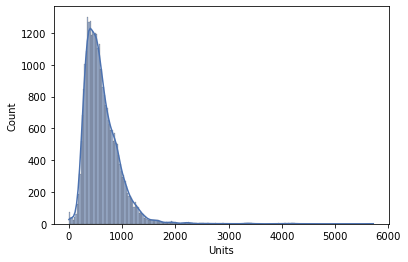

In [83]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Housing['Units'], color="b", kde=True)

([<matplotlib.axis.XTick at 0x1a853ef3730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

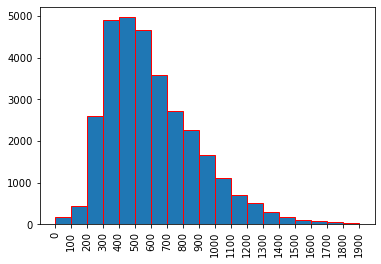

In [84]:
plt.hist(Maryland_Housing['Units'],edgecolor = "red", bins=range(0,2000,100))
plt.xticks(range(0,2000,100), rotation=90)

In [85]:
Maryland_Housing.loc[(Maryland_Housing['Units']>Maryland_Housing['Units'].mean())].shape[0]/len(Maryland_Housing)

0.40560156025194233

In [86]:
Maryland_Housing.loc[(Maryland_Housing['Units']==Maryland_Housing['Units'].max()),('Name','Year')]

,Name,Year
3229,"Block Group 2, Census Tract 9501, Worcester Co...",2019


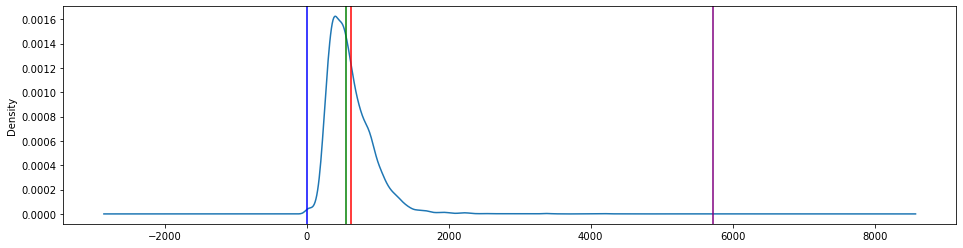

In [87]:
ax = Maryland_Housing['Units'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Housing['Units'].mean(),color='red')
ax.axvline(Maryland_Housing['Units'].median(),color='green')
ax.axvline(Maryland_Housing['Units'].min(),color='blue')
ax.axvline(Maryland_Housing['Units'].max(),color='purple')

## Maryland Population Data

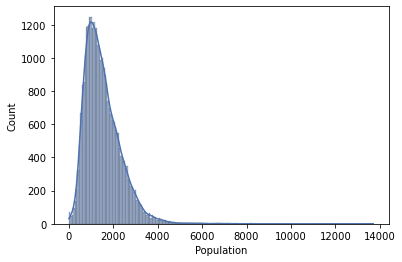

In [88]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Population['Population'], color="b", kde=True)

([<matplotlib.axis.XTick at 0x1a853de1a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

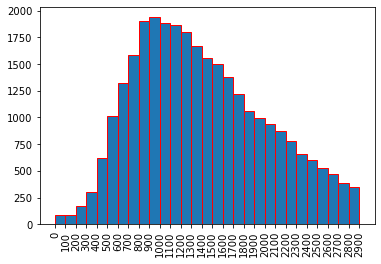

In [89]:
plt.hist(Maryland_Population['Population'],edgecolor = "red", bins=range(0,3000,100))
plt.xticks(range(0,3000,100), rotation=90)

In [90]:
Maryland_Population.loc[(Maryland_Population['Population']>Maryland_Population['Population'].mean())].shape[0]/len(Maryland_Population)

0.42196918955123913

In [91]:
Maryland_Population.loc[(Maryland_Population['Population']==Maryland_Population['Population'].max()),('Name','Year')]

,Name,Year
3082,"Block Group 1, Census Tract 9800, Prince Georg...",2020


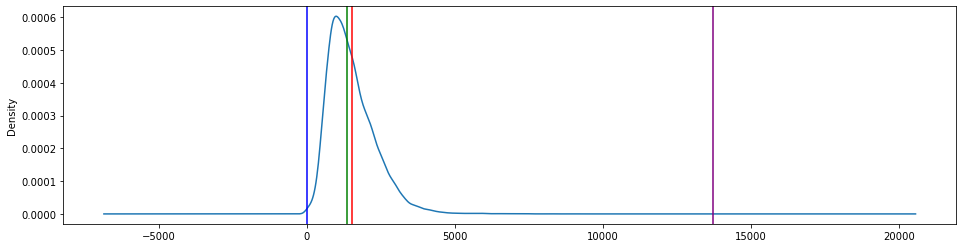

In [92]:
ax = Maryland_Population['Population'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Population['Population'].mean(),color='red')
ax.axvline(Maryland_Population['Population'].median(),color='green')
ax.axvline(Maryland_Population['Population'].min(),color='blue')
ax.axvline(Maryland_Population['Population'].max(),color='purple')

## Maryland Earnings Data

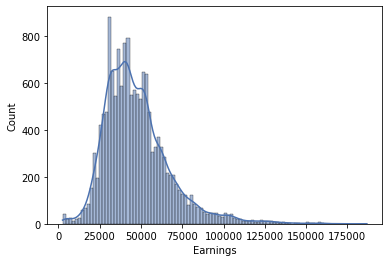

In [93]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Earnings['Earnings'], color="b", kde=True)

([<matplotlib.axis.XTick at 0x1a857031eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

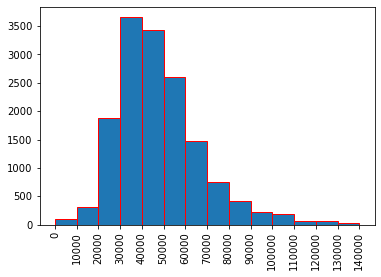

In [94]:
Maryland_Earnings = Maryland_Earnings.sort_values(by = 'Earnings')

plt.hist(Maryland_Earnings['Earnings'],edgecolor = "red", bins=range(0,150000,10000))
plt.xticks(range(0,150000,10000), rotation=90)

In [95]:
Maryland_Earnings.loc[(Maryland_Earnings['Earnings']>Maryland_Earnings['Earnings'].mean())].shape[0]/len(Maryland_Earnings)

0.427773396424816

In [96]:
Maryland_Earnings.loc[(Maryland_Earnings['Earnings']==Maryland_Earnings['Earnings'].max()),('Earnings','Name','Year')]

,Earnings,Name,Year
3835,186773.0,"Block Group 4, Census Tract 2712, Baltimore ci...",2018


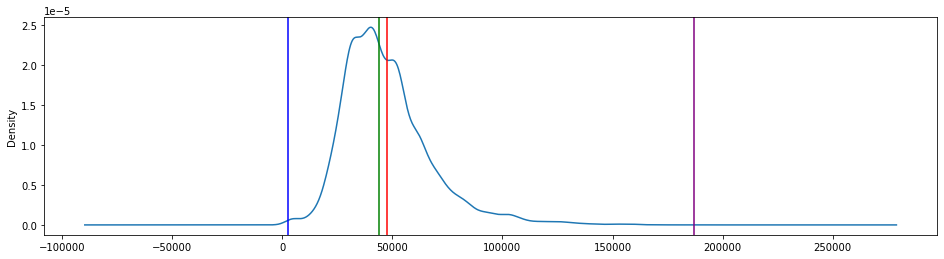

In [97]:
ax = Maryland_Earnings['Earnings'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Earnings['Earnings'].mean(),color='red')
ax.axvline(Maryland_Earnings['Earnings'].median(),color='green')
ax.axvline(Maryland_Earnings['Earnings'].min(),color='blue')
ax.axvline(Maryland_Earnings['Earnings'].max(),color='purple')

## Maryland Poverty Data

In [98]:
Maryland_Poverty['Poverty'] = Maryland_Poverty['Poverty'].astype(int).astype(float)
Maryland_Poverty = Maryland_Poverty.loc[(Maryland_Poverty['Poverty']>0)]
Maryland_Poverty = Maryland_Poverty.sort_values(by = 'Poverty')
Maryland_Poverty['Poverty'].describe()

count    31259.000000
mean       909.165872
std        497.273967
min          3.000000
25%        550.000000
50%        813.000000
75%       1180.000000
max       5621.000000
Name: Poverty, dtype: float64

In [99]:
Maryland_Poverty.loc[(Maryland_Poverty['Poverty']>Maryland_Poverty['Poverty'].mean())].shape[0]/len(Maryland_Poverty)

0.42064685370613264

In [100]:
Maryland_Poverty.loc[(Maryland_Poverty['Poverty']==Maryland_Poverty['Poverty'].max()),('Poverty','Name','Year')]

,Poverty,Name,Year
152,5621.0,"Block Group 3, Census Tract 7301, Anne Arundel...",2019


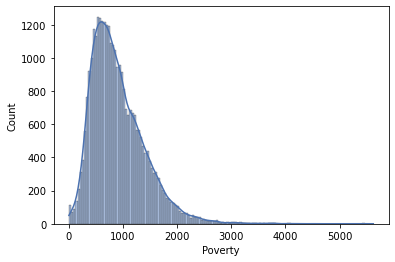

In [101]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Poverty['Poverty'], color="b", kde=True)

([<matplotlib.axis.XTick at 0x1a84f2e7640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

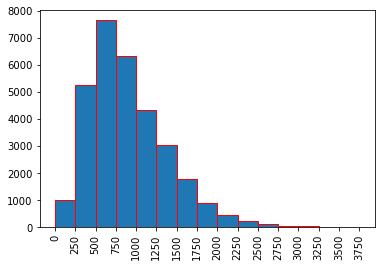

In [102]:
plt.hist(Maryland_Poverty['Poverty'],edgecolor = "red", bins=range(0,4000,250))
plt.xticks(range(0,4000,250), rotation=90)

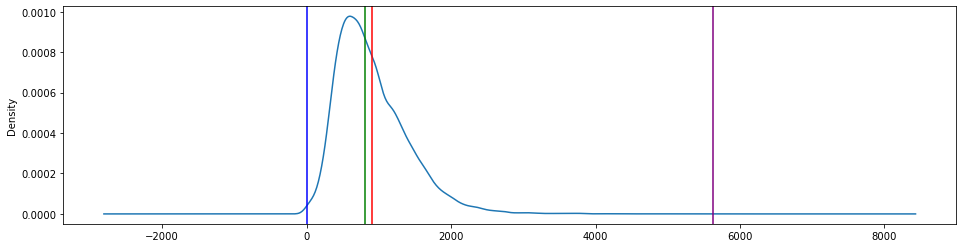

In [103]:
ax = Maryland_Poverty['Poverty'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Poverty['Poverty'].mean(),color='red')
ax.axvline(Maryland_Poverty['Poverty'].median(),color='green')
ax.axvline(Maryland_Poverty['Poverty'].min(),color='blue')
ax.axvline(Maryland_Poverty['Poverty'].max(),color='purple')

## Maryland Employment Data

In [104]:
Maryland_Employment.loc[(Maryland_Employment['Employment']>Maryland_Employment['Employment'].mean())].shape[0]/len(Maryland_Employment)

0.4231174050330112

In [105]:
Maryland_Employment.loc[(Maryland_Employment['Employment']==Maryland_Employment['Employment'].max()),('Employment','Name','Year')]

,Employment,Name,Year
3082,13659.0,"Block Group 1, Census Tract 9800, Prince Georg...",2020


([<matplotlib.axis.XTick at 0x1a84f3eb8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

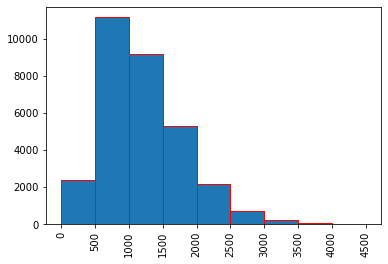

In [106]:
plt.hist(Maryland_Employment['Employment'],edgecolor = "red", bins=range(0,5000,500))
plt.xticks(range(0,5000,500), rotation=90)

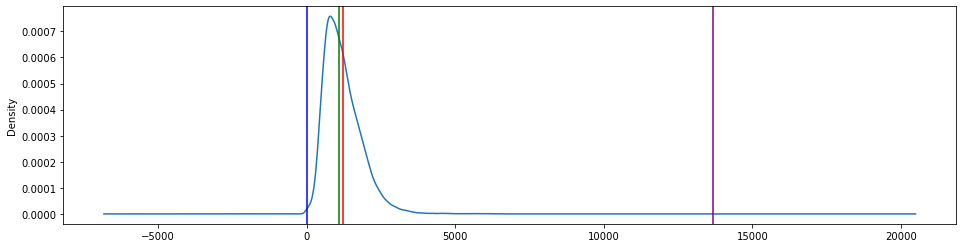

In [107]:
ax = Maryland_Employment['Employment'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Employment['Employment'].mean(),color='red')
ax.axvline(Maryland_Employment['Employment'].median(),color='green')
ax.axvline(Maryland_Employment['Employment'].min(),color='blue')
ax.axvline(Maryland_Employment['Employment'].max(),color='purple')

## Maryland Rooms Data

In [108]:
Maryland_Rooms.loc[(Maryland_Rooms['Rooms']>Maryland_Rooms['Rooms'].mean())].shape[0]/len(Maryland_Rooms)

ZeroDivisionError: division by zero

In [ ]:
Maryland_Rooms.loc[(Maryland_Rooms['Rooms']==Maryland_Rooms['Rooms'].max()),('Rooms','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Rooms['Rooms'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_Rooms['Rooms'],edgecolor = "red", bins=range(0,9,1))
plt.xticks(range(0,9,1), rotation=90)

In [ ]:
ax = Maryland_Rooms['Rooms'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Rooms['Rooms'].mean(),color='red')
ax.axvline(Maryland_Rooms['Rooms'].median(),color='green')
ax.axvline(Maryland_Rooms['Rooms'].min(),color='blue')
ax.axvline(Maryland_Rooms['Rooms'].max(),color='purple')

## Maryland Children Data

In [ ]:
Maryland_Children.loc[(Maryland_Children['Children']>Maryland_Children['Children'].mean())].shape[0]/len(Maryland_Children)

In [ ]:
Maryland_Children.loc[(Maryland_Children['Children']==Maryland_Children['Children'].max()),('Children','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Children['Children'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_Children['Children'],edgecolor = "red", bins=range(0,1500,100))
plt.xticks(range(0,1500,100), rotation=90)

In [ ]:
ax = Maryland_Children['Children'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Children['Children'].mean(),color='red')
ax.axvline(Maryland_Children['Children'].median(),color='green')
ax.axvline(Maryland_Children['Children'].min(),color='blue')
ax.axvline(Maryland_Children['Children'].max(),color='purple')

## Maryland HouseType Data

In [ ]:
Maryland_HouseType.loc[(Maryland_HouseType['HouseType']>Maryland_HouseType['HouseType'].mean())].shape[0]/len(Maryland_HouseType)

In [ ]:
Maryland_HouseType.loc[(Maryland_HouseType['HouseType']==Maryland_HouseType['HouseType'].max()),('HouseType','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_HouseType['HouseType'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_HouseType['HouseType'],edgecolor = "red", bins=range(0,2000,100))
plt.xticks(range(0,2000,100), rotation=90)

In [ ]:
ax = Maryland_HouseType['HouseType'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_HouseType['HouseType'].mean(),color='red')
ax.axvline(Maryland_HouseType['HouseType'].median(),color='green')
ax.axvline(Maryland_HouseType['HouseType'].min(),color='blue')
ax.axvline(Maryland_HouseType['HouseType'].max(),color='purple')

## Maryland Age Data

In [ ]:
Maryland_Age.loc[(Maryland_Age['Age']>Maryland_Age['Age'].mean())].shape[0]/len(Maryland_Age)

In [ ]:
Maryland_Age.loc[(Maryland_Age['Age']==Maryland_Age['Age'].max()),('Age','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Age['Age'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_Age['Age'],edgecolor = "red", bins=range(0,90,10))
plt.xticks(range(0,90,10), rotation=90)

In [ ]:
ax = Maryland_Age['Age'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Age['Age'].mean(),color='red')
ax.axvline(Maryland_Age['Age'].median(),color='green')
ax.axvline(Maryland_Age['Age'].min(),color='blue')
ax.axvline(Maryland_Age['Age'].max(),color='purple')

## Maryland Transportation Data

In [ ]:
Maryland_Transportation.loc[(Maryland_Transportation['Transportation']>Maryland_Transportation['Transportation'].mean())].shape[0]/len(Maryland_Transportation)

In [ ]:
Maryland_Transportation.loc[(Maryland_Transportation['Transportation']==Maryland_Transportation['Transportation'].max()),('Transportation','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_Transportation['Transportation'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_Transportation['Transportation'],edgecolor = "red", bins=range(0,1500,100))
plt.xticks(range(0,1500,100), rotation=90)

In [ ]:
ax = Maryland_Transportation['Transportation'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Transportation['Transportation'].mean(),color='red')
ax.axvline(Maryland_Transportation['Transportation'].median(),color='green')
ax.axvline(Maryland_Transportation['Transportation'].min(),color='blue')
ax.axvline(Maryland_Transportation['Transportation'].max(),color='purple')

## Maryland HousePrice Data

In [ ]:
Maryland_HousePrice.loc[(Maryland_HousePrice['HousePrice']>Maryland_HousePrice['HousePrice'].mean())].shape[0]/len(Maryland_HousePrice)

In [ ]:
Maryland_HousePrice.loc[(Maryland_HousePrice['HousePrice']==Maryland_HousePrice['HousePrice'].max()),('HousePrice','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_HousePrice['HousePrice'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_HousePrice['HousePrice'],edgecolor = "red", bins=range(0,1500000,100000))
plt.xticks(range(0,1500000,100000), rotation=90)

In [ ]:
ax = Maryland_HousePrice['HousePrice'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_HousePrice['HousePrice'].mean(),color='red')
ax.axvline(Maryland_HousePrice['HousePrice'].median(),color='green')
ax.axvline(Maryland_HousePrice['HousePrice'].min(),color='blue')
ax.axvline(Maryland_HousePrice['HousePrice'].max(),color='purple')

## Maryland School Data

In [ ]:
Maryland_School.loc[(Maryland_School['School']>Maryland_School['School'].mean())].shape[0]/len(Maryland_School)

In [ ]:
Maryland_School.loc[(Maryland_School['School']==Maryland_School['School'].max()),('School','Name','Year')]

In [ ]:
#Show graph with density and histogram distributions
sns.set_color_codes()
ax = sns.histplot(Maryland_School['School'], color="b", kde=True)

In [ ]:
plt.hist(Maryland_School['School'],edgecolor = "red", bins=range(0,4000,250))
plt.xticks(range(0,4000,250), rotation=90)

In [ ]:
ax = Maryland_School['School'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_School['School'].mean(),color='red')
ax.axvline(Maryland_School['School'].median(),color='green')
ax.axvline(Maryland_School['School'].min(),color='blue')
ax.axvline(Maryland_School['School'].max(),color='purple')